### **Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator

### **Game Theory Basics**

In [ ]:
def symuluj_dynamike_replikatora(w, x, y, z, pokolenia=20):
    warunki_poczatkowe = [0.1, 0.3, 0.5, 0.7, 0.9]
    trajektorie = []

    for p0 in warunki_poczatkowe:
        p = p0
        traj = [p]
        for _ in range(pokolenia):
            f_P = p * w + (1 - p) * y
            f_N = p * x + (1 - p) * z
            srednia_f = p * f_P + (1 - p) * f_N
            p = p * f_P / srednia_f
            traj.append(p)
        trajektorie.append(traj)

    # Stability of boundary equilibria
    stabilne_P0 = y < z
    stabilne_P1 = w > x

    # Internal equilibrium
    def znajdz_rownowage_wewnetrzna():
        p_vals = np.linspace(0.01, 0.99, 500)
        dp_vals = []
        for p in p_vals:
            f_P = p * w + (1 - p) * y
            f_N = p * x + (1 - p) * z
            srednia_f = p * f_P + (1 - p) * f_N
            dp_vals.append(p * (f_P - srednia_f))
        zmiany_znaku = np.where(np.diff(np.sign(dp_vals)))[0]
        if len(zmiany_znaku) > 0:
            return p_vals[zmiany_znaku[0]]
        return None

    rownowaga_wewn = znajdz_rownowage_wewnetrzna()

    # Plotting
    fig, ax = plt.subplots(figsize=(8,6))
    kolory = plt.get_cmap("tab10")

    for i, p0 in enumerate(warunki_poczatkowe):
        ax.plot(range(pokolenia+1), trajektorie[i], 'o-', color=kolory(i),
                label=f"Początkowy udział P = {p0}")

    # Boundary equilibria lines
    if stabilne_P0:
        ax.axhline(0, color='black', linestyle='-', label="Stabilna równowaga (P=0)")
    else:
        ax.axhline(0, color='black', linestyle='--', label="Niestabilna równowaga (P=0)")

    if stabilne_P1:
        ax.axhline(1, color='black', linestyle='-', label="Stabilna równowaga (P=1)")
    else:
        ax.axhline(1, color='black', linestyle='--', label="Niestabilna równowaga (P=1)")

    # Internal equilibrium line
    if rownowaga_wewn is not None:
        if stabilne_P0 and stabilne_P1:
            ax.axhline(rownowaga_wewn, color='purple', linestyle='--',
                       label=f"Niestabilna równowaga wewnętrzna ≈ {rownowaga_wewn:.2f}")
        elif not stabilne_P0 and not stabilne_P1:
            ax.axhline(rownowaga_wewn, color='purple', linestyle='-',
                       label=f"Stabilna równowaga wewnętrzna ≈ {rownowaga_wewn:.2f}")

    ax.set_xlabel("Czas (pokolenia)")
    ax.set_ylabel("Udział producentów (P)")
    ax.set_title("Dynamika populacji w grze dwu-strategicznej")
    ax.set_xticks(range(pokolenia+1))
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.legend()
    plt.tight_layout()
    plt.style.use('seaborn-v0_8')
    plt.show()

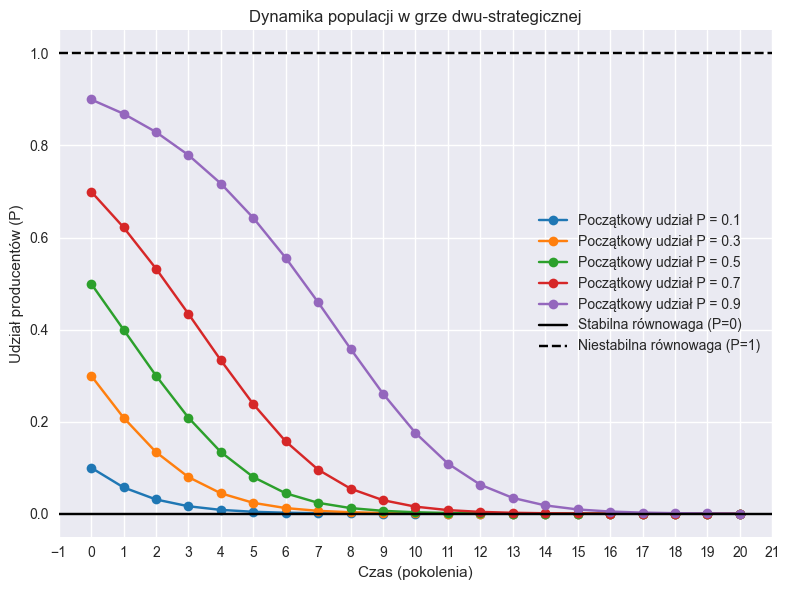

In [26]:
# 🔹 Przykład użycia: klasyczny dylemat więźnia
symuluj_dynamike_replikatora(w=3, x=4, y=1, z=2)

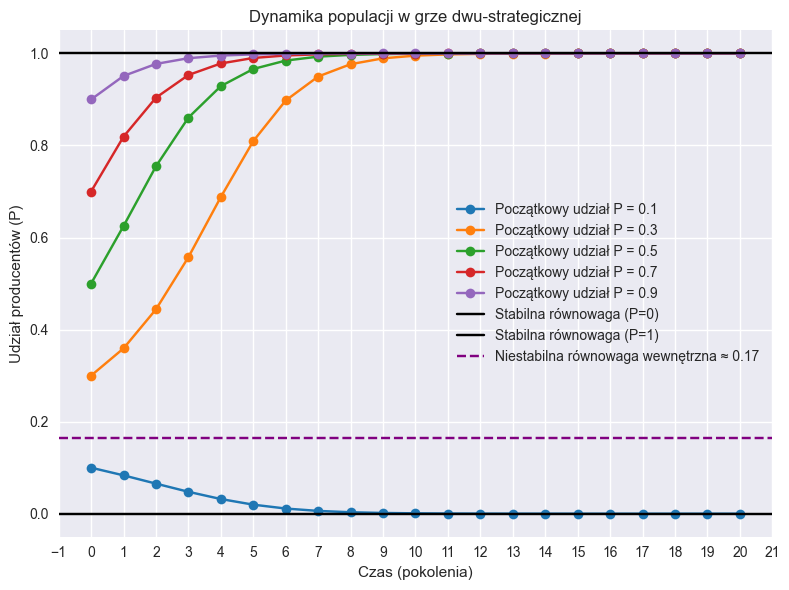

In [27]:
symuluj_dynamike_replikatora(w=9, x=4, y=1, z=2)

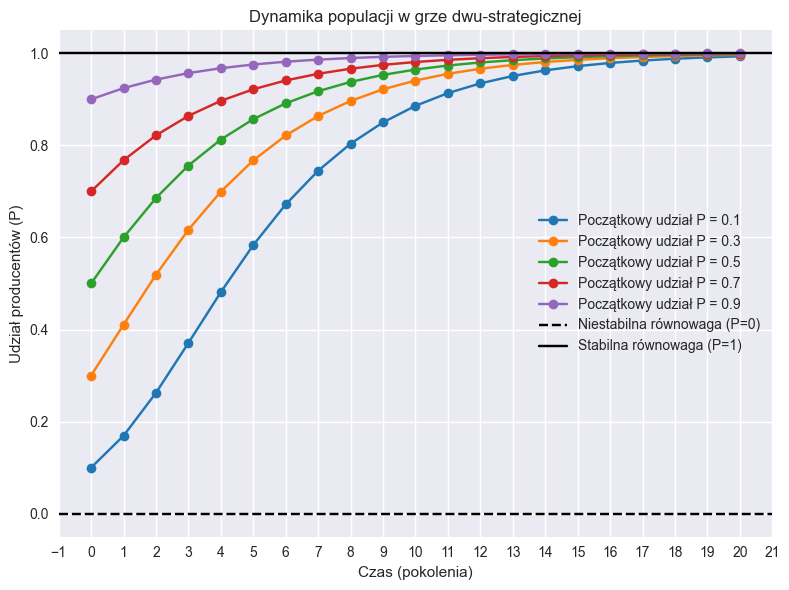

In [28]:
symuluj_dynamike_replikatora(w=4, x=3, y=2, z=1)

#### **Snowdrift game**

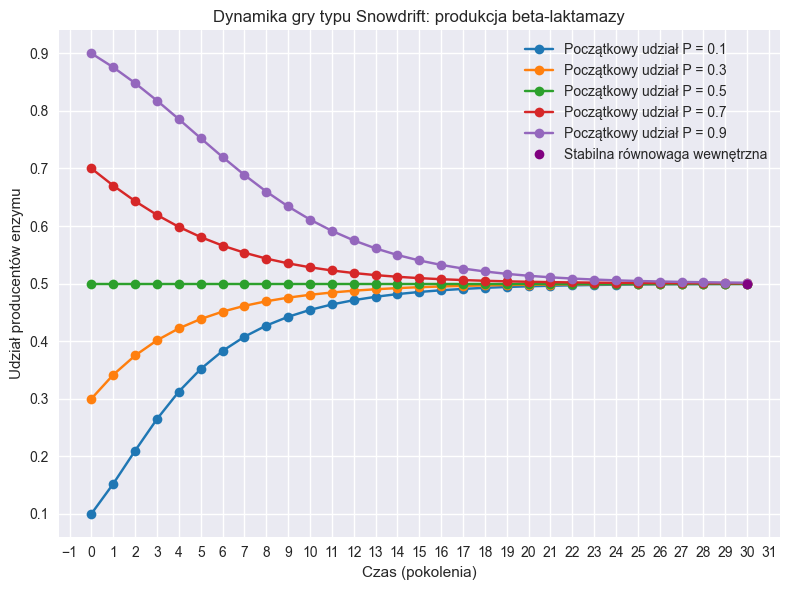

In [11]:
# Styl wykresu
plt.style.use('seaborn-v0_8')

# Parametry gry typu Snowdrift (częściowa prywatyzacja dobra publicznego)
# P (producent), N (nieproducent)
# Producent ma wyższą kondycję, gdy partnerem jest nieproducent
w, x, y, z = 3, 4, 2, 1  # P vs P, N vs P, P vs N, N vs N

# Macierz wypłat
fitness_matrix = np.array([[w, y],
                           [x, z]])

# Parametry symulacji
generations = 30
initial_conditions = [0.1, 0.3, 0.5, 0.7, 0.9]
trajectories = []

# Symulacja dynamiki replikatora
for p0 in initial_conditions:
    p = p0
    traj = [p]
    for _ in range(generations):
        f_P = p * w + (1 - p) * y
        f_N = p * x + (1 - p) * z
        avg_f = p * f_P + (1 - p) * f_N
        p = p * f_P / avg_f
        traj.append(p)
    trajectories.append(traj)

# Szukanie równowagi wewnętrznej
p_vals = np.linspace(0.01, 0.99, 500)
dp_vals = []
for p in p_vals:
    f_P = p * w + (1 - p) * y
    f_N = p * x + (1 - p) * z
    avg_f = p * f_P + (1 - p) * f_N
    dp_vals.append(p * (f_P - avg_f))

zero_crossings = np.where(np.diff(np.sign(dp_vals)))[0]
internal_eq = p_vals[zero_crossings[0]] if len(zero_crossings) > 0 else None

# Rysowanie wykresu
fig, ax = plt.subplots(figsize=(8,6))
colors = plt.get_cmap("tab10")

for i, p0 in enumerate(initial_conditions):
    ax.plot(range(generations+1), trajectories[i], 'o-', color=colors(i),
            label=f"Początkowy udział P = {p0}")

# Równowaga wewnętrzna
if internal_eq is not None:
    ax.plot(generations, internal_eq, 'o', color='purple', label="Stabilna równowaga wewnętrzna")

# Opisy osi i styl
ax.set_xlabel("Czas (pokolenia)")
ax.set_ylabel("Udział producentów enzymu")
ax.set_title("Dynamika gry typu Snowdrift: produkcja beta-laktamazy")
ax.set_xticks(range(generations+1))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.legend()
plt.tight_layout()

#### **Figure 2b simulation**

Zapisano sim_option1.gif


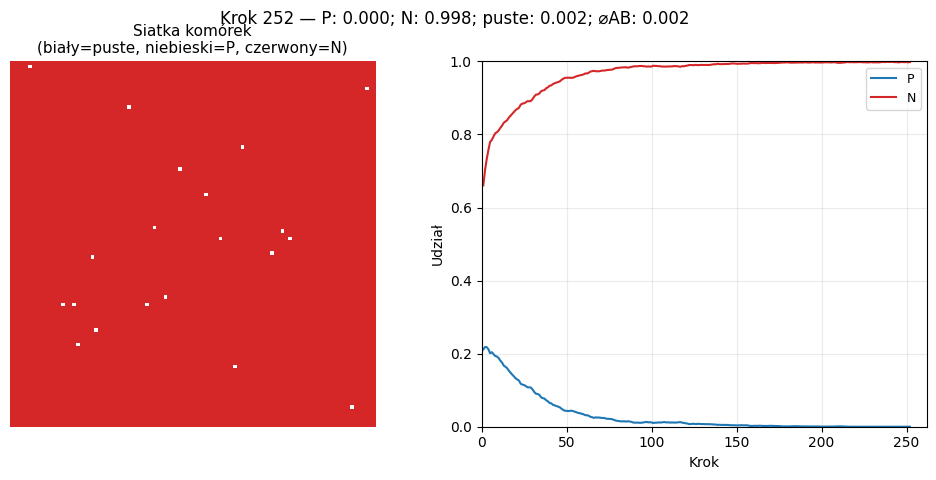

In [1]:
# sim_snowdrift_option1.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors
import matplotlib as mpl

# --- PARAMETRY ---
L = 100
init_P = 0.2
init_N = 0.6
frames = 250
dt_field = 1.0
D_ab = 1.0
D_en = 0.5
decay_ab = 0.02
decay_en = 0.01
ab_inflow = 0.5
prod_en_per_P = 1.0
private_factor = 2.5
cost_P = 0.05
base_growth = 0.5
mortality_ab = 1.0
neighborhood = [(-1,0),(1,0),(0,-1),(0,1)]
show_every = 1
# -----------------

mpl.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'figure.titlesize': 12,
    'legend.fontsize': 9
})

rng = np.random.default_rng(42)

# Inicjalizacja siatki
grid = np.zeros((L, L), dtype=np.int8)
choices = rng.random((L, L))
grid[choices < init_P] = 1
grid[(choices >= init_P) & (choices < init_P + init_N)] = 2

# Pola AB i EN
AB = np.zeros((L, L), dtype=float)
EN = np.zeros((L, L), dtype=float)

def laplacian(field):
    return (
        np.roll(field, 1, axis=0) +
        np.roll(field, -1, axis=0) +
        np.roll(field, 1, axis=1) +
        np.roll(field, -1, axis=1) -
        4 * field
    )

def update_fields(AB, EN, grid):
    AB += ab_inflow * dt_field / (L * L)
    producers = (grid == 1).astype(float)
    EN += prod_en_per_P * producers * dt_field
    AB += D_ab * laplacian(AB) * dt_field
    EN += D_en * laplacian(EN) * dt_field
    AB -= decay_ab * AB * dt_field
    EN -= decay_en * EN * dt_field
    AB[AB < 0] = 0.0
    EN[EN < 0] = 0.0
    return AB, EN

def effective_ab_pressure(i, j, AB, EN, grid):
    local_ab = AB[i, j]
    local_en = EN[i, j]
    en_effect = local_en / (1.0 + local_en)
    protected_ab = local_ab * (1.0 - en_effect)
    if grid[i, j] == 1:
        protected_ab /= private_factor
    return protected_ab

def update_population(grid, AB, EN):
    Lloc = grid.shape[0]
    order = [(i,j) for i in range(Lloc) for j in range(Lloc)]
    rng.shuffle(order)
    for (i,j) in order:
        state = grid[i,j]
        eff_ab = effective_ab_pressure(i, j, AB, EN, grid)
        death_prob = 1.0 - np.exp(-mortality_ab * eff_ab)
        if state != 0 and rng.random() < death_prob:
            grid[i,j] = 0
            continue
        if state != 0 and rng.random() < effective_growth(state, eff_ab):
            di, dj = neighborhood[rng.integers(len(neighborhood))]
            ni = (i + di) % Lloc
            nj = (j + dj) % Lloc
            grid[ni, nj] = state
    return grid

def effective_growth(state, eff_ab):
    k = 3.0
    growth = base_growth * np.exp(-k * eff_ab)
    if state == 1:
        growth = max(0.0, growth - cost_P)
    return min(1.0, max(0.0, growth))

# --- Rysunki ---
fig = plt.figure(figsize=(10, 5))
ax_grid = fig.add_subplot(1, 2, 1)
ax_plot = fig.add_subplot(1, 2, 2)

cmap = colors.ListedColormap(['white', '#1f77b4', '#d62728'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

im_grid = ax_grid.imshow(grid, cmap=cmap, norm=norm, interpolation='nearest')
ax_grid.set_title('Siatka komórek\n(biały=puste, niebieski=P, czerwony=N)')
ax_grid.axis('off')

times, prop_P, prop_N = [], [], []
line_P, = ax_plot.plot([], [], color='#1f77b4', label='P')
line_N, = ax_plot.plot([], [], color='#d62728', label='N')
ax_plot.set_xlim(0, frames)
ax_plot.set_ylim(0, 1)
ax_plot.set_xlabel('Krok')
ax_plot.set_ylabel('Udział')
ax_plot.legend(loc='upper right')
ax_plot.grid(alpha=0.25)

step = 0
def animate(frame):
    global grid, AB, EN, step
    for _ in range(show_every):
        AB, EN = update_fields(AB, EN, grid)
        grid = update_population(grid, AB, EN)
        step += 1
    im_grid.set_data(grid)
    total = grid.size
    p = np.count_nonzero(grid == 1) / total
    n = np.count_nonzero(grid == 2) / total
    mean_ab = AB.mean()
    times.append(step)
    prop_P.append(p)
    prop_N.append(n)
    line_P.set_data(times, prop_P)
    line_N.set_data(times, prop_N)
    ax_plot.set_xlim(0, max(100, step+10))
    fig.suptitle(f'Krok {step} — P: {p:.3f}; N: {n:.3f}; puste: {1-p-n:.3f}; ⌀AB: {mean_ab:.3f}', fontsize=12)
    return im_grid, line_P, line_N

fps = 18
interval = int(round(1000 / fps))
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=interval, blit=False, repeat=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Zapis jako GIF
ani.save('sim_option1.gif', writer='pillow', fps=fps)
print("Zapisano sim_option1.gif")


Zapisano sim_snowdrift_game.gif


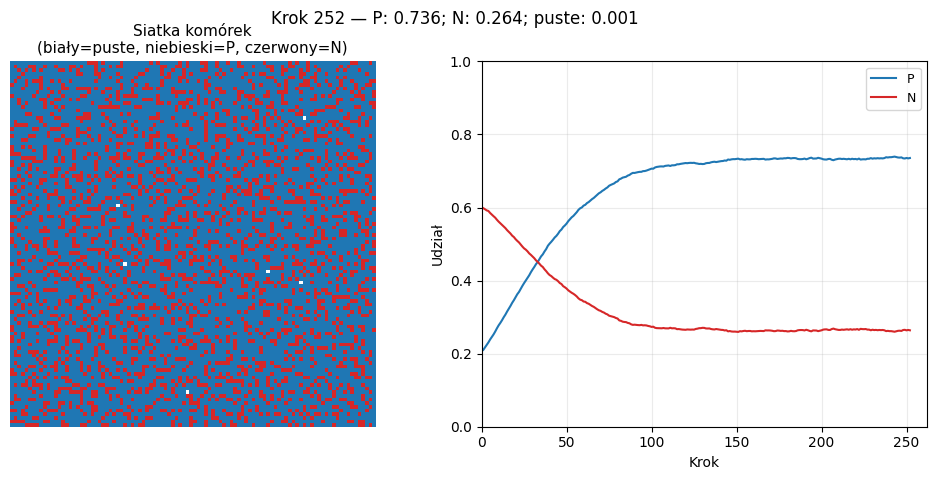

In [2]:
# sim_snowdrift_game.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors
import matplotlib as mpl

# --- PARAMETRY GRY ---
L = 100          # rozmiar siatki
init_P = 0.2     # początkowy udział producentów
init_N = 0.6     # początkowy udział nieproducentów
frames = 250     # liczba klatek animacji
beta = 5.0       # selekcyjność w regule Fermi
updates_per_frame = 500  # ile mikro-aktualizacji na jedną klatkę

# wypłaty (Snowdrift: w<x i y>z)
w, x, y, z = 3.0, 4.0, 4.0, 1.0

# sąsiedztwo Moore'a (8 sąsiadów)
neigh8 = [(-1,-1),(-1,0),(-1,1),
          (0,-1),        (0,1),
          (1,-1),(1,0),(1,1)]

# --- INICJALIZACJA ---
rng = np.random.default_rng(42)
grid = np.zeros((L, L), dtype=np.int8)
choices = rng.random((L, L))
grid[choices < init_P] = 1
grid[(choices >= init_P) & (choices < init_P + init_N)] = 2

# --- FUNKCJE ---
def local_payoff(grid, i, j):
    s = grid[i, j]
    if s == 0:
        return 0.0
    Lloc = grid.shape[0]
    pay, count = 0.0, 0
    for di, dj in neigh8:
        ni = (i + di) % Lloc
        nj = (j + dj) % Lloc
        t = grid[ni, nj]
        if t == 0:
            continue
        count += 1
        if s == 1 and t == 1: pay += w
        elif s == 1 and t == 2: pay += y
        elif s == 2 and t == 1: pay += x
        elif s == 2 and t == 2: pay += z
    return pay / max(1, count)

def imitation_update(grid):
    Lloc = grid.shape[0]
    i, j = rng.integers(0, Lloc, size=2)
    di, dj = neigh8[rng.integers(len(neigh8))]
    ni, nj = (i + di) % Lloc, (j + dj) % Lloc
    s, t = grid[i, j], grid[ni, nj]
    if s == t: return grid
    if s == 0 and t in (1,2):  # puste przyjmuje stan sąsiada
        if rng.random() < 0.5:
            grid[i, j] = t
        return grid
    ps, pt = local_payoff(grid, i, j), local_payoff(grid, ni, nj)
    p_adopt = 1.0 / (1.0 + np.exp(-beta * (pt - ps)))
    if rng.random() < p_adopt:
        grid[i, j] = t
    return grid

# --- RYSUNKI ---
mpl.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10,5))
ax_grid = fig.add_subplot(1,2,1)
ax_plot = fig.add_subplot(1,2,2)

cmap = colors.ListedColormap(['white','#1f77b4','#d62728'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

im_grid = ax_grid.imshow(grid, cmap=cmap, norm=norm, interpolation='nearest')
ax_grid.set_title('Siatka komórek\n(biały=puste, niebieski=P, czerwony=N)')
ax_grid.axis('off')

times, prop_P, prop_N = [], [], []
line_P, = ax_plot.plot([],[],color='#1f77b4',label='P')
line_N, = ax_plot.plot([],[],color='#d62728',label='N')
ax_plot.set_xlim(0, frames)
ax_plot.set_ylim(0, 1)
ax_plot.set_xlabel('Krok')
ax_plot.set_ylabel('Udział')
ax_plot.legend(loc='upper right')
ax_plot.grid(alpha=0.25)

step = 0
def animate(frame):
    global grid, step
    for _ in range(updates_per_frame):
        grid = imitation_update(grid)
    step += 1
    im_grid.set_data(grid)
    total = grid.size
    p = np.count_nonzero(grid==1)/total
    n = np.count_nonzero(grid==2)/total
    times.append(step)
    prop_P.append(p)
    prop_N.append(n)
    line_P.set_data(times, prop_P)
    line_N.set_data(times, prop_N)
    ax_plot.set_xlim(0, max(100, step+10))
    fig.suptitle(f'Krok {step} — P: {p:.3f}; N: {n:.3f}; puste: {1-p-n:.3f}', fontsize=12)
    return im_grid, line_P, line_N

fps = 18
interval = int(round(1000/fps))
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=interval, blit=False, repeat=False)

plt.tight_layout(rect=[0,0.03,1,0.95])
ani.save('sim_snowdrift_game.gif', writer='pillow', fps=fps)
print("Zapisano sim_snowdrift_game.gif")

### Gemini

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#### a) The Prisoner's dillema

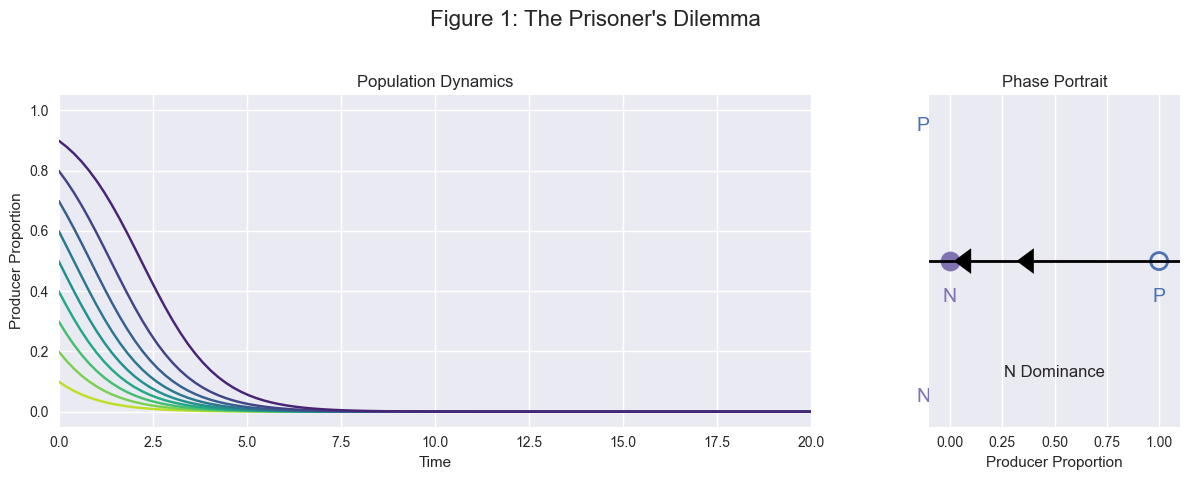

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Model Definition (same as before) ---

def replicator_equation(p, t, W):
    """
    Calculates the derivative of the producer proportion p based on the replicator equation.
    W is the fitness matrix: [[w, y], [x, z]]
    """
    producer_prop = p[0]
    w, y = W[0]
    x, z = W[1]
    f_P = producer_prop * w + (1 - producer_prop) * y
    f_N = producer_prop * x + (1 - producer_prop) * z
    f_avg = producer_prop * f_P + (1 - producer_prop) * f_N
    dp_dt = producer_prop * (f_P - f_avg)
    return [dp_dt]

# --- Updated Plotting Function ---

def plot_figure_1_updated(W_pd):
    """
    Generates plots for Figure 1b and 1d with seaborn style and corrected labels.
    """
    # Apply the requested style
    plt.style.use('seaborn-v0_8')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 1]})
    fig.suptitle("Figure 1: The Prisoner's Dilemma", fontsize=16)

    # --- Figure 1b: Population Dynamics ---
    ax1.set_title("Population Dynamics")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Producer Proportion")
    ax1.set_ylim(-0.05, 1.05)
    ax1.set_xlim(0, 20)
    
    t = np.linspace(0, 20, 100)
    initial_proportions = np.arange(0.1, 1.0, 0.1)
    
    # Use a different colormap that works well with the style
    colors = plt.cm.viridis(np.linspace(0.9, 0.1, len(initial_proportions)))
    
    for i, p0 in enumerate(initial_proportions):
        solution = odeint(replicator_equation, [p0], t, args=(W_pd,))
        ax1.plot(t, solution[:, 0], color=colors[i])
        
    ax1.plot([22, 22], [0, 1], color='black', lw=2)
    ax1.scatter(22, 1, s=150, facecolors='none', edgecolors='C0', lw=2) # Unstable equilibrium
    ax1.scatter(22, 0, s=150, facecolors='C3', edgecolors='C3', lw=2)    # Stable equilibrium
    ax1.arrow(22, 0.9, 0, -0.15, head_width=0.5, head_length=0.05, fc='C0', ec='C0', lw=1.5)
    ax1.arrow(22, 0.1, 0, -0.05, head_width=0.5, head_length=0.05, fc='C3', ec='C3', lw=1.5)
    ax1.text(22.8, 0.95, "P", fontsize=14, color="C0", va='center')
    ax1.text(22.8, 0.05, "N", fontsize=14, color="C3", va='center')

    # --- Figure 1d: Phase Portrait (with corrected labels) ---
    ax2.set_title("Phase Portrait")
    ax2.set_xlabel("Producer Proportion")
    ax2.set_yticks([])
    ax2.set_ylim(-1, 1)
    ax2.set_xlim(-0.1, 1.1)
    
    ax2.axhline(0, color='black', lw=2)
    ax2.scatter(1, 0, s=150, facecolors='none', edgecolors='C0', lw=2) # P is unstable
    ax2.scatter(0, 0, s=150, facecolors='C3', edgecolors='C3', lw=2)    # N is stable (ESS)
    ax2.arrow(0.7, 0, -0.3, 0, head_width=0.15, head_length=0.08, fc='black', ec='black')
    ax2.arrow(0.3, 0, -0.2, 0, head_width=0.15, head_length=0.08, fc='black', ec='black')
    
    # CORRECTED LABELS: Placed below the axis to label the equilibria
    ax2.text(1.0, -0.25, "P", fontsize=14, color="C0", ha='center')
    ax2.text(0.0, -0.25, "N", fontsize=14, color="C3", ha='center')
    ax2.text(0.5, -0.7, "N Dominance", fontsize=12, ha='center')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Fitness Matrix from Figure 1a
W_prisoners_dilemma = np.array([
    [3, 1],  # P payoffs (w, y)
    [4, 2]   # N payoffs (x, z)
])

# Run the updated plotting function
plot_figure_1_updated(W_prisoners_dilemma)

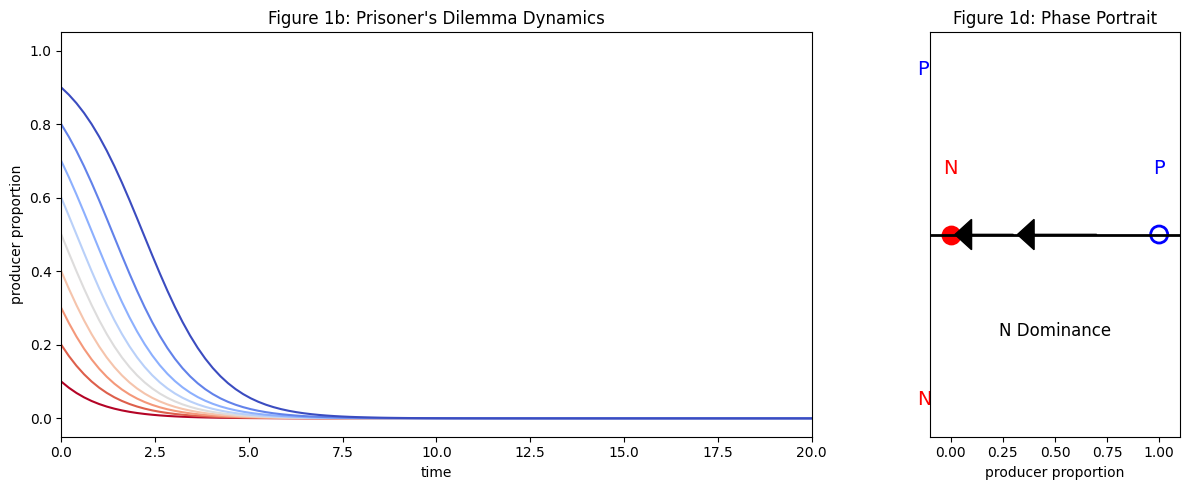

In [2]:
# --- Model Definition ---

def replicator_equation(p, t, W):
    """
    Calculates the derivative of the producer proportion p based on the replicator equation.
    W is the fitness matrix: [[w, y], [x, z]]
    """
    # p is a 1-element array [producer_proportion]
    producer_prop = p[0]
    
    # Unpack fitness matrix
    w, y = W[0]
    x, z = W[1]
    
    # Fitness of Producer (P) and Non-producer (N)
    f_P = producer_prop * w + (1 - producer_prop) * y
    f_N = producer_prop * x + (1 - producer_prop) * z
    
    # Average population fitness
    f_avg = producer_prop * f_P + (1 - producer_prop) * f_N
    
    # Replicator equation: dp/dt = p * (f_P - f_avg)
    dp_dt = producer_prop * (f_P - f_avg)
    
    return [dp_dt]

# --- Plotting Function ---

def plot_figure_1(W_pd):
    """
    Generates plots similar to Figure 1b and 1d for the Prisoner's Dilemma.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 1]})
    
    # --- Figure 1b: Population Dynamics ---
    ax1.set_title("Figure 1b: Prisoner's Dilemma Dynamics")
    ax1.set_xlabel("time")
    ax1.set_ylabel("producer proportion")
    ax1.set_ylim(-0.05, 1.05)
    ax1.set_xlim(0, 20)
    
    # Time points for the simulation
    t = np.linspace(0, 20, 100)
    
    # Initial proportions for producers
    initial_proportions = np.arange(0.1, 1.0, 0.1)
    
    # Colors for trajectories
    colors = plt.cm.coolwarm(np.linspace(1, 0, len(initial_proportions)))
    
    for i, p0 in enumerate(initial_proportions):
        # Solve the ODE
        solution = odeint(replicator_equation, [p0], t, args=(W_pd,))
        ax1.plot(t, solution[:, 0], color=colors[i])
        
    # Add vertical line segment representing equilibria
    ax1.plot([22, 22], [0, 1], color='black', lw=2)
    ax1.scatter(22, 1, s=150, facecolors='none', edgecolors='blue', lw=2) # Unstable equilibrium at P=1
    ax1.scatter(22, 0, s=150, facecolors='red', edgecolors='red', lw=2)    # Stable equilibrium at N=1
    ax1.arrow(22, 0.9, 0, -0.15, head_width=0.5, head_length=0.05, fc='blue', ec='blue', lw=1.5)
    ax1.arrow(22, 0.1, 0, -0.05, head_width=0.5, head_length=0.05, fc='red', ec='red', lw=1.5)
    ax1.text(22.8, 0.95, "P", fontsize=14, color="blue", va='center')
    ax1.text(22.8, 0.05, "N", fontsize=14, color="red", va='center')

    # --- Figure 1d: Phase Portrait ---
    ax2.set_title("Figure 1d: Phase Portrait")
    ax2.set_xlabel("producer proportion")
    ax2.set_yticks([])
    ax2.set_ylim(-1, 1)
    ax2.set_xlim(-0.1, 1.1)
    
    ax2.axhline(0, color='black', lw=2)
    # Equilibria
    ax2.scatter(1, 0, s=150, facecolors='none', edgecolors='blue', lw=2) # P is unstable
    ax2.scatter(0, 0, s=150, facecolors='red', edgecolors='red', lw=2)    # N is stable (ESS)
    # Dynamics arrows
    ax2.arrow(0.7, 0, -0.3, 0, head_width=0.15, head_length=0.08, fc='black', ec='black')
    ax2.arrow(0.3, 0, -0.2, 0, head_width=0.15, head_length=0.08, fc='black', ec='black')
    ax2.text(1.0, 0.3, "P", fontsize=14, color="blue", ha='center')
    ax2.text(0.0, 0.3, "N", fontsize=14, color="red", ha='center')
    ax2.text(0.5, -0.5, "N Dominance", fontsize=12, ha='center')
    
    plt.tight_layout()
    plt.show()

# Fitness Matrix from Figure 1a
W_prisoners_dilemma = np.array([
    [3, 1],  # P payoffs (w, y)
    [4, 2]   # N payoffs (x, z)
])

plot_figure_1(W_prisoners_dilemma)

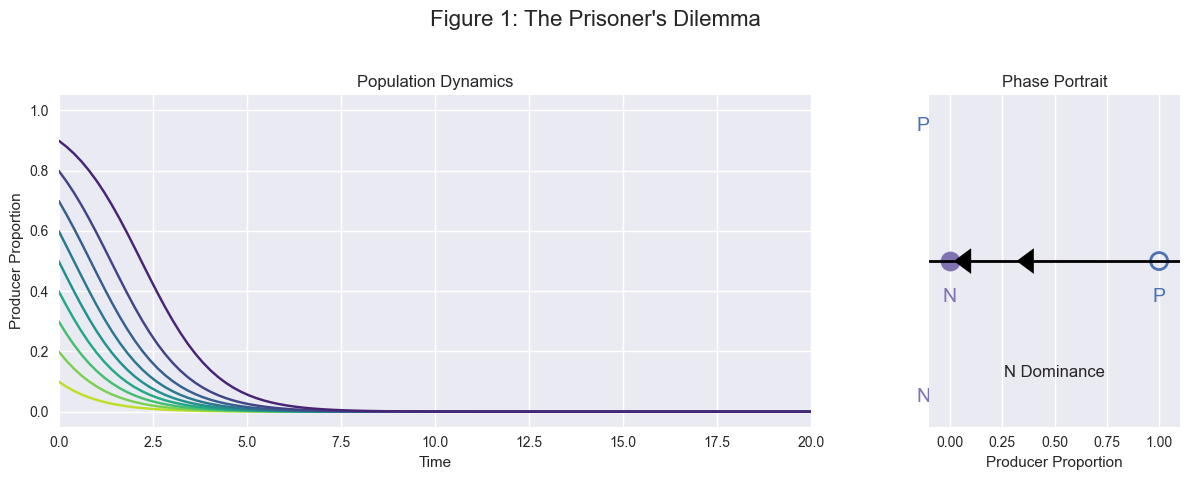

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Model Definition (same as before) ---

def replicator_equation(p, t, W):
    """
    Calculates the derivative of the producer proportion p based on the replicator equation.
    W is the fitness matrix: [[w, y], [x, z]]
    """
    producer_prop = p[0]
    w, y = W[0]
    x, z = W[1]
    f_P = producer_prop * w + (1 - producer_prop) * y
    f_N = producer_prop * x + (1 - producer_prop) * z
    f_avg = producer_prop * f_P + (1 - producer_prop) * f_N
    dp_dt = producer_prop * (f_P - f_avg)
    return [dp_dt]

# --- Updated Plotting Function ---

def plot_figure_1_updated(W_pd):
    """
    Generates plots for Figure 1b and 1d with seaborn style and corrected labels.
    """
    # Apply the requested style
    plt.style.use('seaborn-v0_8')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 1]})
    fig.suptitle("Figure 1: The Prisoner's Dilemma", fontsize=16)

    # --- Figure 1b: Population Dynamics ---
    ax1.set_title("Population Dynamics")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Producer Proportion")
    ax1.set_ylim(-0.05, 1.05)
    ax1.set_xlim(0, 20)
    
    t = np.linspace(0, 20, 100)
    initial_proportions = np.arange(0.1, 1.0, 0.1)
    
    # Use a different colormap that works well with the style
    colors = plt.cm.viridis(np.linspace(0.9, 0.1, len(initial_proportions)))
    
    for i, p0 in enumerate(initial_proportions):
        solution = odeint(replicator_equation, [p0], t, args=(W_pd,))
        ax1.plot(t, solution[:, 0], color=colors[i])
        
    ax1.plot([22, 22], [0, 1], color='black', lw=2)
    ax1.scatter(22, 1, s=150, facecolors='none', edgecolors='C0', lw=2) # Unstable equilibrium
    ax1.scatter(22, 0, s=150, facecolors='C3', edgecolors='C3', lw=2)    # Stable equilibrium
    ax1.arrow(22, 0.9, 0, -0.15, head_width=0.5, head_length=0.05, fc='C0', ec='C0', lw=1.5)
    ax1.arrow(22, 0.1, 0, -0.05, head_width=0.5, head_length=0.05, fc='C3', ec='C3', lw=1.5)
    ax1.text(22.8, 0.95, "P", fontsize=14, color="C0", va='center')
    ax1.text(22.8, 0.05, "N", fontsize=14, color="C3", va='center')

    # --- Figure 1d: Phase Portrait (with corrected labels) ---
    ax2.set_title("Phase Portrait")
    ax2.set_xlabel("Producer Proportion")
    ax2.set_yticks([])
    ax2.set_ylim(-1, 1)
    ax2.set_xlim(-0.1, 1.1)
    
    ax2.axhline(0, color='black', lw=2)
    ax2.scatter(1, 0, s=150, facecolors='none', edgecolors='C0', lw=2) # P is unstable
    ax2.scatter(0, 0, s=150, facecolors='C3', edgecolors='C3', lw=2)    # N is stable (ESS)
    ax2.arrow(0.7, 0, -0.3, 0, head_width=0.15, head_length=0.08, fc='black', ec='black')
    ax2.arrow(0.3, 0, -0.2, 0, head_width=0.15, head_length=0.08, fc='black', ec='black')
    
    # CORRECTED LABELS: Placed below the axis to label the equilibria
    ax2.text(1.0, -0.25, "P", fontsize=14, color="C0", ha='center')
    ax2.text(0.0, -0.25, "N", fontsize=14, color="C3", ha='center')
    ax2.text(0.5, -0.7, "N Dominance", fontsize=12, ha='center')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Fitness Matrix from Figure 1a
W_prisoners_dilemma = np.array([
    [3, 1],  # P payoffs (w, y)
    [4, 2]   # N payoffs (x, z)
])

# Run the updated plotting function
plot_figure_1_updated(W_prisoners_dilemma)

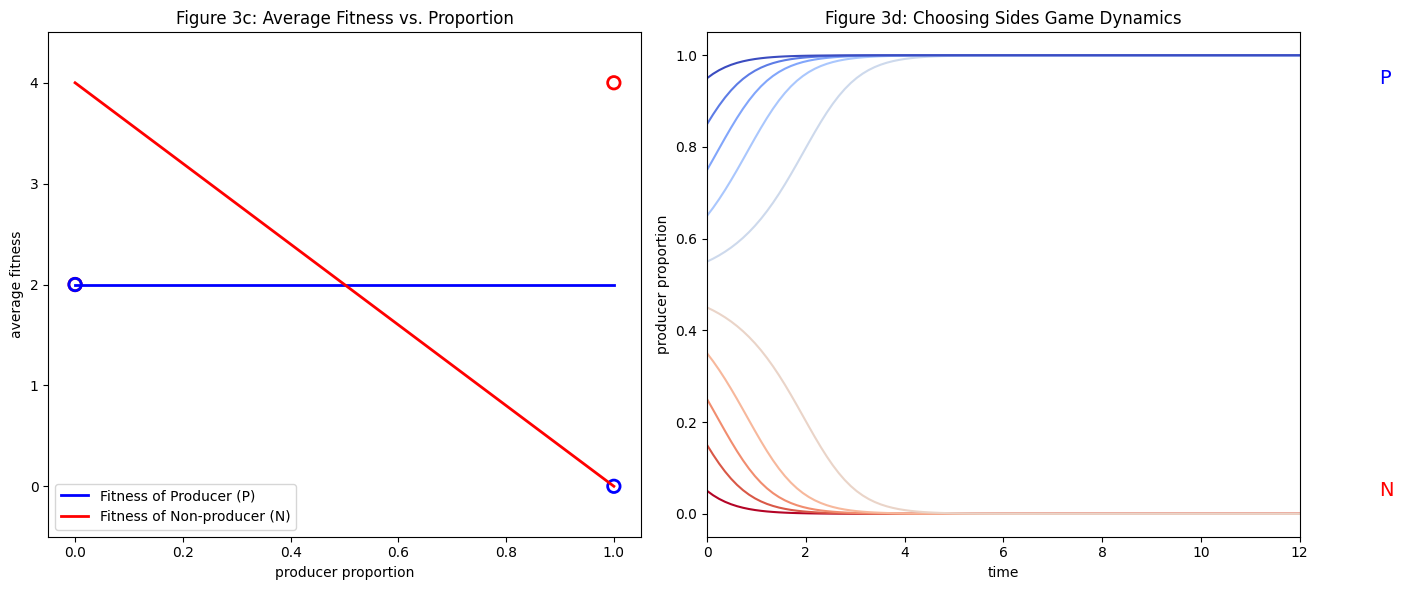

In [4]:
def plot_figure_3(W_cs):
    """
    Generates plots similar to Figure 3c and 3d for the Choosing Sides Game.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Figure 3c: Average Fitness Plot ---
    ax1.set_title("Figure 3c: Average Fitness vs. Proportion")
    ax1.set_xlabel("producer proportion")
    ax1.set_ylabel("average fitness")
    ax1.set_xlim(-0.05, 1.05)
    ax1.set_ylim(-0.5, 4.5)

    p_props = np.linspace(0, 1, 100)
    w, y = W_cs[0]
    x, z = W_cs[1]
    
    f_P = p_props * w + (1 - p_props) * y
    f_N = p_props * x + (1 - p_props) * z
    
    ax1.plot(p_props, f_P, color='blue', lw=2, label='Fitness of Producer (P)')
    ax1.plot(p_props, f_N, color='red', lw=2, label='Fitness of Non-producer (N)')
    ax1.scatter([0, 1], [y, z], s=80, facecolors='none', edgecolors='red', lw=2)
    ax1.scatter([0, 1], [w, x], s=80, facecolors='none', edgecolors='blue', lw=2)
    ax1.legend()
    
    # --- Figure 3d: Population Dynamics Simulation ---
    ax2.set_title("Figure 3d: Choosing Sides Game Dynamics")
    ax2.set_xlabel("time")
    ax2.set_ylabel("producer proportion")
    ax2.set_ylim(-0.05, 1.05)
    ax2.set_xlim(0, 12)
    
    t = np.linspace(0, 12, 100)
    initial_proportions = np.arange(0.05, 1.0, 0.1)
    colors = plt.cm.coolwarm_r(np.linspace(0, 1, len(initial_proportions)))
    
    for i, p0 in enumerate(initial_proportions):
        solution = odeint(replicator_equation, [p0], t, args=(W_cs,))
        ax2.plot(t, solution[:, 0], color=colors[i])
        
    # Vertical line segment for equilibria
    ax2.plot([13, 13], [0, 1], color='black', lw=2)
    # Find equilibrium point: p = (z-y) / (w-y-x+z)
    p_eq = (z - y) / (w - y - x + z)
    ax2.scatter(13, 1, s=150, facecolors='blue', edgecolors='blue', lw=2)   # Stable
    ax2.scatter(13, 0, s=150, facecolors='red', edgecolors='red', lw=2)     # Stable
    ax2.scatter(13, p_eq, s=150, facecolors='none', edgecolors='purple', lw=2) # Unstable
    ax2.arrow(13, p_eq + 0.1, 0, 0.15, head_width=0.3, head_length=0.05, fc='blue', ec='blue', lw=1.5)
    ax2.arrow(13, p_eq - 0.1, 0, -0.15, head_width=0.3, head_length=0.05, fc='red', ec='red', lw=1.5)
    ax2.text(13.6, 0.95, "P", fontsize=14, color="blue", va='center')
    ax2.text(13.6, 0.05, "N", fontsize=14, color="red", va='center')

    plt.tight_layout()
    plt.show()

# Fitness Matrix from Figure 3b
W_choosing_sides = np.array([
    [2, 2],  # P payoffs (w, y)
    [0, 4]   # N payoffs (x, z)
])

plot_figure_3(W_choosing_sides)

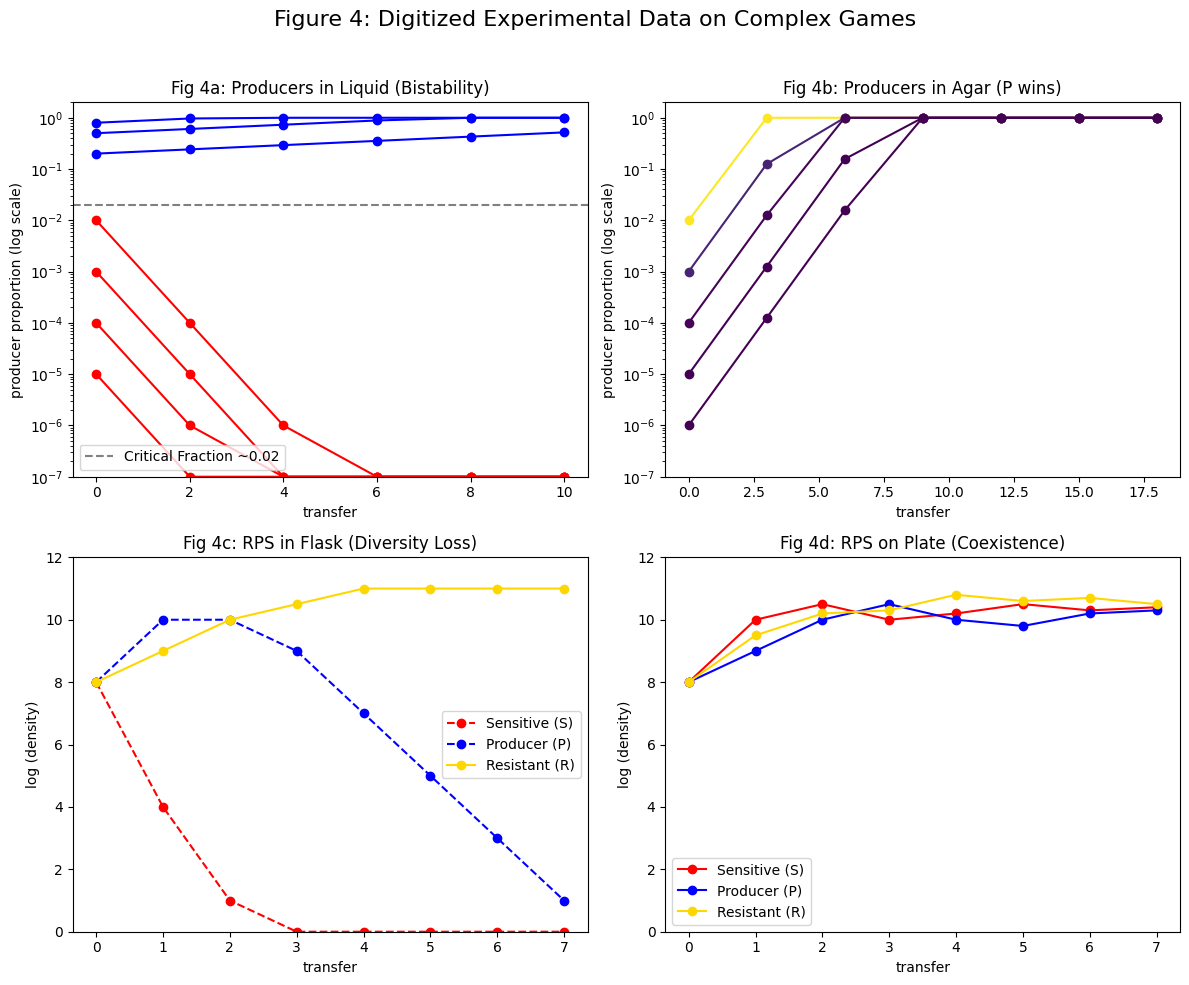

In [5]:
def plot_figure_4():
    """
    Generates plots by digitizing the experimental data from Figure 4.
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Figure 4: Digitized Experimental Data on Complex Games", fontsize=16)

    # --- Figure 4a: Colicin producers in liquid culture (well-mixed) ---
    ax = axes[0, 0]
    ax.set_title("Fig 4a: Producers in Liquid (Bistability)")
    ax.set_xlabel("transfer")
    ax.set_ylabel("producer proportion (log scale)")
    ax.set_yscale('log')
    ax.set_ylim(1e-7, 2)
    transfers_a = np.arange(0, 11, 2)
    # Data is illustrative; lines show the trend
    for start_prop in [0.8, 0.5, 0.2]: # Go to fixation
        y = np.maximum(1e-7, start_prop * (1.1**transfers_a))
        ax.plot(transfers_a, np.clip(y, 1e-7, 1.0), 'o-', color='blue')
    for start_prop in [1e-2, 1e-3, 1e-4, 1e-5]: # Go to extinction
        y = start_prop * (0.1**transfers_a)
        ax.plot(transfers_a, np.maximum(y, 1e-7), 'o-', color='red')
    ax.axhline(0.02, ls='--', color='grey', label='Critical Fraction ~0.02')
    ax.legend(loc='lower left')

    # --- Figure 4b: Colicin producers in soft agar (spatial structure) ---
    ax = axes[0, 1]
    ax.set_title("Fig 4b: Producers in Agar (P wins)")
    ax.set_xlabel("transfer")
    ax.set_ylabel("producer proportion (log scale)")
    ax.set_yscale('log')
    ax.set_ylim(1e-7, 2)
    transfers_b = np.arange(0, 19, 3)
    for start_prop in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
        y = start_prop * (5**transfers_b)
        ax.plot(transfers_b, np.clip(y, 1e-7, 1.0), 'o-', color=plt.cm.viridis(start_prop*100))

    # --- Figure 4c: RPS dynamics in flask (well-mixed) ---
    ax = axes[1, 0]
    ax.set_title("Fig 4c: RPS in Flask (Diversity Loss)")
    ax.set_xlabel("transfer")
    ax.set_ylabel("log (density)")
    transfers_c = np.arange(8)
    # Sensitive (S)
    s_density = [8, 4, 1, 0, 0, 0, 0, 0]
    # Producer (P)
    p_density = [8, 10, 10, 9, 7, 5, 3, 1]
    # Resistant (R)
    r_density = [8, 9, 10, 10.5, 11, 11, 11, 11]
    ax.plot(transfers_c, s_density, 'o--', color='red', label='Sensitive (S)')
    ax.plot(transfers_c, p_density, 'o--', color='blue', label='Producer (P)')
    ax.plot(transfers_c, r_density, 'o-', color='gold', label='Resistant (R)')
    ax.legend()
    ax.set_ylim(0, 12)
    
    # --- Figure 4d: RPS dynamics on agar plate (spatial structure) ---
    ax = axes[1, 1]
    ax.set_title("Fig 4d: RPS on Plate (Coexistence)")
    ax.set_xlabel("transfer")
    ax.set_ylabel("log (density)")
    transfers_d = np.arange(8)
    s_density_d = [8, 10, 10.5, 10, 10.2, 10.5, 10.3, 10.4]
    p_density_d = [8, 9, 10, 10.5, 10, 9.8, 10.2, 10.3]
    r_density_d = [8, 9.5, 10.2, 10.3, 10.8, 10.6, 10.7, 10.5]
    ax.plot(transfers_d, s_density_d, 'o-', color='red', label='Sensitive (S)')
    ax.plot(transfers_d, p_density_d, 'o-', color='blue', label='Producer (P)')
    ax.plot(transfers_d, r_density_d, 'o-', color='gold', label='Resistant (R)')
    ax.legend()
    ax.set_ylim(0, 12)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_figure_4()